--- Demonstrating Color Calibration Artifact ---


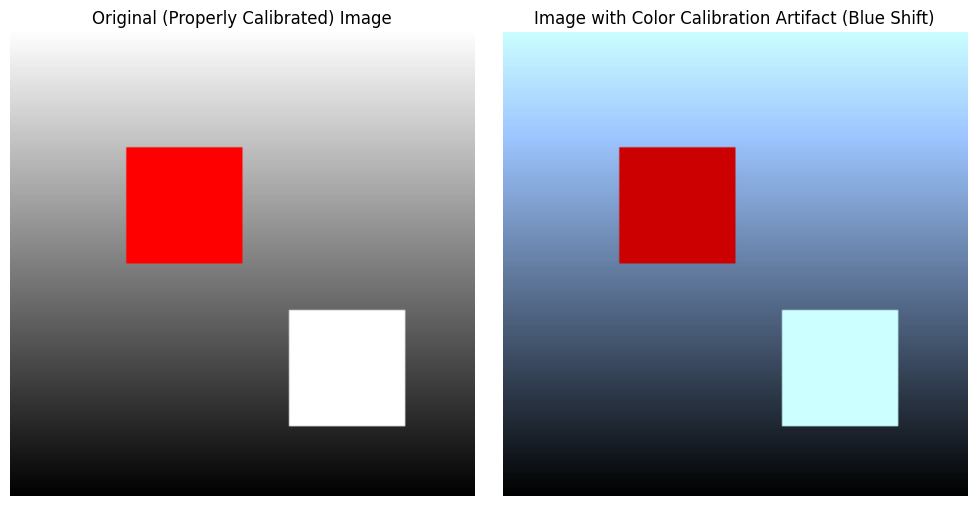

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def create_synthetic_image():
    width, height = 200, 200
    img = np.zeros((height, width, 3), dtype=np.uint8)

    for y in range(height):
        intensity = int(255 * (1 - y / height))
        img[y, :, :] = intensity

    img[50:100, 50:100, 0] = 255 # Red channel max
    img[50:100, 50:100, 1] = 0   # Green channel min
    img[50:100, 50:100, 2] = 0   # Blue channel min

    img[120:170, 120:170, :] = 255

    return Image.fromarray(img)

def apply_color_calibration_artifact(image_pil, blue_shift_factor=1.3, red_reduction_factor=0.8):
    img_np = np.array(image_pil).astype(np.float32)

    img_np[..., 2] = np.clip(img_np[..., 2] * blue_shift_factor, 0, 255) # Boost Blue
    img_np[..., 0] = np.clip(img_np[..., 0] * red_reduction_factor, 0, 255) # Reduce Red

    return Image.fromarray(img_np.astype(np.uint8))

print("--- Demonstrating Color Calibration Artifact ---")

# 1. Create a synthetic "original" image
original_image_pil = create_synthetic_image()

# 2. Apply the simulated improper calibration (blue shift)
artifact_image_pil = apply_color_calibration_artifact(original_image_pil)

# Display the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(original_image_pil)
axes[0].set_title("Original (Properly Calibrated) Image")
axes[0].axis('off')

axes[1].imshow(artifact_image_pil)
axes[1].set_title("Image with Color Calibration Artifact (Blue Shift)")
axes[1].axis('off')

plt.tight_layout()
plt.show()